# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [2]:
#!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"].get("lat", "Nothing")
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
{'coord': {'lon': -94.76, 'lat': 39.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1011, 'humidity': 65, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1529977980, 'sys': {'type': 1, 'id': 1664, 'message': 0.0068, 'country': 'US', 'sunrise': 1530010323, 'sunset': 1530064308}, 'id': 4407665, 'name': 'Kodiak', 'cod': 200}
Processing Record 2 of Set 1 | pevek
{'coord': {'lon': 170.27, 'lat': 69.7}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 34.28, 'pressure': 1009.02, 'humidity': 96, 'temp_min': 34.28, 'temp_max': 34.28, 'sea_level': 1016.19, 'grnd_level': 1009.02}, 'wind': {'speed': 8.75, 'deg': 317.503}, 'clouds': {'all': 

{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 79.28, 'pressure': 948.88, 'humidity': 58, 'temp_min': 79.28, 'temp_max': 79.28, 'sea_level': 1026, 'grnd_level': 948.88}, 'wind': {'speed': 2.71, 'deg': 126.003}, 'clouds': {'all': 32}, 'dt': 1529982068, 'sys': {'message': 0.0913, 'country': 'TL', 'sunrise': 1529963580, 'sunset': 1530005361}, 'id': 1651810, 'name': 'Airai', 'cod': 200}
Processing Record 19 of Set 1 | vila velha
{'coord': {'lon': -38.6, 'lat': -3.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1014, 'humidity': 78, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1529978400, 'sys': {'type': 1, 'id': 4498, 'message': 0.0034, 'country': 'BR', 'sunrise': 1530002402, 'sunset': 15300452

{'coord': {'lon': 122.77, 'lat': 63.9}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 71.36, 'pressure': 997.03, 'humidity': 54, 'temp_min': 71.36, 'temp_max': 71.36, 'sea_level': 1016.19, 'grnd_level': 997.03}, 'wind': {'speed': 6.73, 'deg': 326.003}, 'clouds': {'all': 36}, 'dt': 1529982072, 'sys': {'message': 0.0038, 'country': 'RU', 'sunrise': 1529947507, 'sunset': 1530022658}, 'id': 2021017, 'name': 'Kysyl-Syr', 'cod': 200}
Processing Record 36 of Set 1 | half moon bay
{'coord': {'lon': -122.43, 'lat': 37.46}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.94, 'pressure': 1016, 'humidity': 82, 'temp_min': 57.2, 'temp_max': 77}, 'visibility': 11265, 'wind': {'speed': 4.72, 'deg': 281.003}, 'clouds': {'all': 90}, 'dt': 1529980800, 'sys': {'type': 1, 'id': 392, 'message': 0.006, 'country': 'US', 'sunrise': 1530017431

{'coord': {'lon': 74.49, 'lat': 65.85}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 63.62, 'pressure': 1022.32, 'humidity': 94, 'temp_min': 63.62, 'temp_max': 63.62, 'sea_level': 1029.36, 'grnd_level': 1022.32}, 'wind': {'speed': 5.39, 'deg': 286.503}, 'clouds': {'all': 12}, 'dt': 1529982077, 'sys': {'message': 0.0039, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 1495626, 'name': 'Pangody', 'cod': 200}
Processing Record 3 of Set 2 | cidreira
{'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 54.44, 'pressure': 1020.86, 'humidity': 100, 'temp_min': 54.44, 'temp_max': 54.44, 'sea_level': 1031.06, 'grnd_level': 1020.86}, 'wind': {'speed': 7.18, 'deg': 255.503}, 'rain': {'3h': 0.345}, 'clouds': {'all': 92}, 'dt': 1529982077, 'sys': {'message': 0.0034, 'country': 'BR', 'sunrise': 1530008252, '

{'coord': {'lon': 149.07, 'lat': -23.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.24, 'pressure': 1013.48, 'humidity': 64, 'temp_min': 65.24, 'temp_max': 65.24, 'sea_level': 1036.66, 'grnd_level': 1013.48}, 'wind': {'speed': 14.79, 'deg': 109.003}, 'clouds': {'all': 92}, 'dt': 1529982081, 'sys': {'message': 0.0035, 'country': 'AU', 'sunrise': 1529959555, 'sunset': 1529998029}, 'id': 2175403, 'name': 'Bluff', 'cod': 200}
Processing Record 22 of Set 2 | tariba
{'coord': {'lon': -72.22, 'lat': 7.82}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1015, 'humidity': 65, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1529978400, 'sys': {'type': 1, 'id': 4249, 'message': 0.0036, 'country': 'VE', 'sunrise': 1530009269, 'sunset'

{'coord': {'lon': -115.58, 'lat': 53.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1003, 'humidity': 59, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 24140, 'wind': {'speed': 6.93, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1529978400, 'sys': {'type': 1, 'id': 3225, 'message': 0.0042, 'country': 'CA', 'sunrise': 1530011636, 'sunset': 1530072983}, 'id': 5921525, 'name': 'Mackay', 'cod': 200}
Processing Record 40 of Set 2 | srednekolymsk
{'coord': {'lon': 153.71, 'lat': 67.46}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 43.37, 'pressure': 1009.83, 'humidity': 100, 'temp_min': 43.37, 'temp_max': 43.37, 'sea_level': 1019.8, 'grnd_level': 1009.83}, 'wind': {'speed': 8.63, 'deg': 26.0025}, 'rain': {'3h': 2.62}, 'clouds': {'all': 92}, 'dt': 1529982107, 'sys': {'message': 0.0043, 'country': 'RU', 'sunrise':

{'coord': {'lon': 97.04, 'lat': 40.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 79.37, 'pressure': 844.55, 'humidity': 42, 'temp_min': 79.37, 'temp_max': 79.37, 'sea_level': 1016.23, 'grnd_level': 844.55}, 'wind': {'speed': 6.96, 'deg': 96.0025}, 'clouds': {'all': 0}, 'dt': 1529982111, 'sys': {'message': 0.0038, 'country': 'CN', 'sunrise': 1529964212, 'sunset': 1530018342}, 'id': 1528998, 'name': 'Yumen', 'cod': 200}
Processing Record 6 of Set 3 | jamestown
{'coord': {'lon': 138.6, 'lat': -33.21}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 47.33, 'pressure': 983.49, 'humidity': 64, 'temp_min': 47.33, 'temp_max': 47.33, 'sea_level': 1044.96, 'grnd_level': 983.49}, 'wind': {'speed': 5.06, 'deg': 90.5025}, 'clouds': {'all': 80}, 'dt': 1529982111, 'sys': {'message': 0.0035, 'country': 'AU', 'sunrise': 1529963373, 'sunset': 1

{'coord': {'lon': 95.32, 'lat': 5.56}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.23, 'pressure': 997.76, 'humidity': 69, 'temp_min': 84.23, 'temp_max': 84.23, 'sea_level': 1023.48, 'grnd_level': 997.76}, 'wind': {'speed': 2.93, 'deg': 206.003}, 'clouds': {'all': 48}, 'dt': 1529982116, 'sys': {'message': 0.0043, 'country': 'ID', 'sunrise': 1529969292, 'sunset': 1530014093}, 'id': 1215502, 'name': 'Banda Aceh', 'cod': 200}
Processing Record 25 of Set 3 | college
{'coord': {'lon': -147.8, 'lat': 64.86}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 72.77, 'pressure': 1006, 'humidity': 27, 'temp_min': 71.6, 'temp_max': 73.4}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 250}, 'clouds': {'all': 40}, 'dt': 1529978280, 'sys': {'type': 1, 'id': 63, 'message': 0.0037, 'country': 'US', 'sunrise': 1530010896, 'sunse

{'coord': {'lon': -117.19, 'lat': 34.06}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 79.95, 'pressure': 1023, 'humidity': 12, 'temp_min': 71.6, 'temp_max': 86}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 260}, 'clouds': {'all': 1}, 'dt': 1529980500, 'sys': {'type': 1, 'id': 358, 'message': 0.0057, 'country': 'US', 'sunrise': 1530016753, 'sunset': 1530068648}, 'id': 5386754, 'name': 'Redlands', 'cod': 200}
Processing Record 40 of Set 3 | caravelas
{'coord': {'lon': -39.27, 'lat': -17.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.59, 'pressure': 1032.45, 'humidity': 100, 'temp_min': 75.59, 'temp_max': 75.59, 'sea_level': 1032.48, 'grnd_level': 1032.45}, 'wind': {'speed': 9.98, 'deg': 65.5025}, 'clouds': {'all': 76}, 'dt': 1529982120, 'sys': {'message': 0.0037, 'country': 'BR', 'sunrise': 1530004069, 'sunset': 153004393

{'coord': {'lon': -122.67, 'lat': 45.52}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 67.75, 'pressure': 1020, 'humidity': 43, 'temp_min': 64.4, 'temp_max': 69.8}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 340, 'gust': 7.7}, 'clouds': {'all': 40}, 'dt': 1529978160, 'sys': {'type': 1, 'id': 2274, 'message': 0.0039, 'country': 'US', 'sunrise': 1530015810, 'sunset': 1530072218}, 'id': 5746545, 'name': 'Portland', 'cod': 200}
Processing Record 8 of Set 4 | bardiyah
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 9 of Set 4 | maralal
{'coord': {'lon': 36.7, 'lat': 1.1}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 55.43, 'pressure': 849.09, 'humidity': 100, 'temp_min': 55.43, 'temp_max': 55.43, 'sea_level': 1026.44, 'grnd_level': 849.09}, 'wind': {'speed': 2.37, 'deg': 

{'coord': {'lon': 11.24, 'lat': 64.86}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 49.58, 'pressure': 1027.83, 'humidity': 100, 'temp_min': 49.58, 'temp_max': 49.58, 'sea_level': 1037.3, 'grnd_level': 1027.83}, 'wind': {'speed': 14.34, 'deg': 237.003}, 'rain': {'3h': 0.125}, 'clouds': {'all': 92}, 'dt': 1529982144, 'sys': {'message': 0.0044, 'country': 'NO', 'sunrise': 1529972689, 'sunset': 1530050993}, 'id': 3141310, 'name': 'Rorvik', 'cod': 200}
Processing Record 24 of Set 4 | port moresby
{'coord': {'lon': 147.16, 'lat': -9.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1011, 'humidity': 66, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 220}, 'clouds': {'all': 40}, 'dt': 1529978400, 'sys': {'type': 1, 'id': 8151, 'message': 0.004, 'country': 'PG', 'sunrise': 152

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.77, 'pressure': 987.54, 'humidity': 100, 'temp_min': 30.77, 'temp_max': 30.77, 'sea_level': 1019.35, 'grnd_level': 987.54}, 'wind': {'speed': 3.49, 'deg': 295.003}, 'clouds': {'all': 76}, 'dt': 1529982148, 'sys': {'message': 0.0038, 'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
Processing Record 41 of Set 4 | mayumba
{'coord': {'lon': 10.65, 'lat': -3.44}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.53, 'pressure': 1015.27, 'humidity': 98, 'temp_min': 72.53, 'temp_max': 72.53, 'sea_level': 1026.2, 'grnd_level': 1015.27}, 'wind': {'speed': 6.73, 'deg': 163.503}, 'clouds': {'all': 92}, 'dt': 1529982148, 'sys': {'message': 0.0052, 'country': 'GA', 'sunrise': 1529990552, 'sunset': 15300334

{'coord': {'lon': 138.43, 'lat': 38.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1012, 'humidity': 65, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 340}, 'clouds': {'all': 0}, 'dt': 1529978400, 'sys': {'type': 1, 'id': 7599, 'message': 0.0043, 'country': 'JP', 'sunrise': 1529954697, 'sunset': 1530007988}, 'id': 1853371, 'name': 'Ryotsu', 'cod': 200}
Processing Record 9 of Set 5 | leningradskiy
{'coord': {'lon': 178.42, 'lat': 69.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 43.28, 'pressure': 1011.62, 'humidity': 68, 'temp_min': 43.28, 'temp_max': 43.28, 'sea_level': 1014.36, 'grnd_level': 1011.62}, 'wind': {'speed': 8.41, 'deg': 186.003}, 'clouds': {'all': 92}, 'dt': 1529982153, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 21238

{'coord': {'lon': -1.75, 'lat': 4.89}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.87, 'pressure': 1022.48, 'humidity': 100, 'temp_min': 74.87, 'temp_max': 74.87, 'sea_level': 1025.55, 'grnd_level': 1022.48}, 'wind': {'speed': 5.95, 'deg': 221.503}, 'clouds': {'all': 64}, 'dt': 1529982157, 'sys': {'message': 0.0528, 'country': 'GH', 'sunrise': 1529992663, 'sunset': 1530037323}, 'id': 2294915, 'name': 'Takoradi', 'cod': 200}
Processing Record 25 of Set 5 | xiaoshi
{'coord': {'lon': 116.63, 'lat': 30.59}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 87.38, 'pressure': 991.68, 'humidity': 70, 'temp_min': 87.38, 'temp_max': 87.38, 'sea_level': 1020.48, 'grnd_level': 991.68}, 'wind': {'speed': 9.75, 'deg': 215.003}, 'clouds': {'all': 12}, 'dt': 1529982166, 'sys': {'message': 0.0039, 'country': 'CN', 'sunrise': 1529961161, 'sun

{'coord': {'lon': 90.62, 'lat': 26.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 76.94, 'pressure': 1007.81, 'humidity': 100, 'temp_min': 76.94, 'temp_max': 76.94, 'sea_level': 1014, 'grnd_level': 1007.81}, 'wind': {'speed': 2.71, 'deg': 42.0025}, 'rain': {'3h': 2.395}, 'clouds': {'all': 92}, 'dt': 1529982173, 'sys': {'message': 0.0037, 'country': 'IN', 'sunrise': 1529968026, 'sunset': 1530017613}, 'id': 1271151, 'name': 'Goalpara', 'cod': 200}
Processing Record 41 of Set 5 | ngaoundere
{'coord': {'lon': 13.58, 'lat': 7.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 58.31, 'pressure': 892.78, 'humidity': 94, 'temp_min': 58.31, 'temp_max': 58.31, 'sea_level': 1024.66, 'grnd_level': 892.78}, 'wind': {'speed': 2.26, 'deg': 168.503}, 'clouds': {'all': 8}, 'dt': 1529982173, 'sys': {'message': 0.0038, 'country': 'CM', 'sunrise': 15

{'coord': {'lon': -42.27, 'lat': -2.76}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 74.96, 'pressure': 1024.91, 'humidity': 91, 'temp_min': 74.96, 'temp_max': 74.96, 'sea_level': 1026.69, 'grnd_level': 1024.91}, 'wind': {'speed': 6.29, 'deg': 26.0025}, 'clouds': {'all': 24}, 'dt': 1529982177, 'sys': {'message': 0.0059, 'country': 'BR', 'sunrise': 1530003184, 'sunset': 1530046254}, 'id': 3385899, 'name': 'Tutoia', 'cod': 200}
Processing Record 6 of Set 6 | zhanaozen
{'coord': {'lon': 52.85, 'lat': 43.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 79.91, 'pressure': 1007.89, 'humidity': 26, 'temp_min': 79.91, 'temp_max': 79.91, 'sea_level': 1024.62, 'grnd_level': 1007.89}, 'wind': {'speed': 13.56, 'deg': 131.003}, 'clouds': {'all': 0}, 'dt': 1529982177, 'sys': {'message': 0.0039, 'country': 'KZ', 'sunrise': 1529974179, 'sunset'

{'coord': {'lon': 124.16, 'lat': 24.34}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1012, 'humidity': 74, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1529978400, 'sys': {'type': 1, 'id': 7627, 'message': 0.0046, 'country': 'JP', 'sunrise': 1529960218, 'sunset': 1530009320}, 'id': 1861416, 'name': 'Ishigaki', 'cod': 200}
Processing Record 24 of Set 6 | swan hill
{'coord': {'lon': 143.56, 'lat': -35.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 43.91, 'pressure': 1037.07, 'humidity': 100, 'temp_min': 43.91, 'temp_max': 43.91, 'sea_level': 1046.5, 'grnd_level': 1037.07}, 'wind': {'speed': 5.39, 'deg': 109.003}, 'clouds': {'all': 88}, 'dt': 1529982182, 'sys': {'message': 0.0033, 'country': 'AU', 'sunrise': 1529962512, 'sunset': 1529

{'coord': {'lon': 27.91, 'lat': -33.02}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 67.13, 'pressure': 1031.72, 'humidity': 100, 'temp_min': 67.13, 'temp_max': 67.13, 'sea_level': 1036.37, 'grnd_level': 1031.72}, 'wind': {'speed': 17.81, 'deg': 46.0025}, 'clouds': {'all': 24}, 'dt': 1529982186, 'sys': {'message': 0.0695, 'country': 'ZA', 'sunrise': 1529989912, 'sunset': 1530025838}, 'id': 1006984, 'name': 'East London', 'cod': 200}
Processing Record 41 of Set 6 | ruatoria
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 42 of Set 6 | grayvoron
{'coord': {'lon': 35.67, 'lat': 50.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.4, 'pressure': 1022, 'humidity': 76, 'temp_min': 55.4, 'temp_max': 55.4}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1

{'coord': {'lon': 118.35, 'lat': 63.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 74.96, 'pressure': 998.81, 'humidity': 51, 'temp_min': 74.96, 'temp_max': 74.96, 'sea_level': 1019.23, 'grnd_level': 998.81}, 'wind': {'speed': 7.96, 'deg': 329.003}, 'clouds': {'all': 0}, 'dt': 1529982200, 'sys': {'message': 0.0031, 'country': 'RU', 'sunrise': 1529949351, 'sunset': 1530022942}, 'id': 2018735, 'name': 'Nyurba', 'cod': 200}
Processing Record 7 of Set 7 | nazas
{'coord': {'lon': -104.11, 'lat': 25.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.91, 'pressure': 844.55, 'humidity': 30, 'temp_min': 70.91, 'temp_max': 70.91, 'sea_level': 1021.78, 'grnd_level': 844.55}, 'wind': {'speed': 4.94, 'deg': 81.5025}, 'clouds': {'all': 36}, 'dt': 1529982200, 'sys': {'message': 0.0036, 'country': 'MX', 'sunrise': 1530014899, 'sunset':

{'coord': {'lon': 144.96, 'lat': -35.53}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 48.14, 'pressure': 1033.99, 'humidity': 100, 'temp_min': 48.14, 'temp_max': 48.14, 'sea_level': 1046.59, 'grnd_level': 1033.99}, 'wind': {'speed': 5.28, 'deg': 92.0025}, 'clouds': {'all': 48}, 'dt': 1529982207, 'sys': {'message': 0.004, 'country': 'AU', 'sunrise': 1529962206, 'sunset': 1529997351}, 'id': 2169068, 'name': 'Deniliquin', 'cod': 200}
Processing Record 22 of Set 7 | alihe
{'coord': {'lon': 123.73, 'lat': 50.57}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 58.4, 'pressure': 945.72, 'humidity': 100, 'temp_min': 58.4, 'temp_max': 58.4, 'sea_level': 1014.41, 'grnd_level': 945.72}, 'wind': {'speed': 3.49, 'deg': 104.003}, 'rain': {'3h': 4.86}, 'clouds': {'all': 92}, 'dt': 1529982207, 'sys': {'message': 0.01, 'country': 'CN', 'su

{'coord': {'lon': 27.06, 'lat': -14.99}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.82, 'pressure': 898.38, 'humidity': 58, 'temp_min': 61.82, 'temp_max': 61.82, 'sea_level': 1032.32, 'grnd_level': 898.38}, 'wind': {'speed': 10.2, 'deg': 110.503}, 'clouds': {'all': 76}, 'dt': 1529982211, 'sys': {'message': 0.0047, 'country': 'ZM', 'sunrise': 1529987841, 'sunset': 1530028315}, 'id': 904422, 'name': 'Mumbwa', 'cod': 200}
Processing Record 41 of Set 7 | catuday
{'coord': {'lon': 119.81, 'lat': 16.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.68, 'pressure': 1020.86, 'humidity': 100, 'temp_min': 84.68, 'temp_max': 84.68, 'sea_level': 1023.89, 'grnd_level': 1020.86}, 'wind': {'speed': 1.59, 'deg': 266.003}, 'clouds': {'all': 0}, 'dt': 1529982211, 'sys': {'message': 0.0038, 'country': 'PH', 'sunrise': 1529962241, 'sunset'

{'coord': {'lon': 8.4, 'lat': 45.18}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 66.22, 'pressure': 1020, 'humidity': 72, 'temp_min': 64.4, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1529979600, 'sys': {'type': 1, 'id': 5792, 'message': 0.0058, 'country': 'IT', 'sunrise': 1529984426, 'sunset': 1530040679}, 'id': 3164565, 'name': 'Vila', 'cod': 200}
Processing Record 7 of Set 8 | comodoro rivadavia
{'coord': {'lon': -67.48, 'lat': -45.87}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 46.4, 'pressure': 995, 'humidity': 89, 'temp_min': 46.4, 'temp_max': 46.4}, 'visibility': 10000, 'wind': {'speed': 20.8, 'deg': 290, 'gust': 14.4}, 'clouds': {'all': 20}, 'dt': 1529978400, 'sys': {'type': 1, 'id': 4741, 'message': 0.0046, 'country': 'AR', 'sunrise': 1530015160, 'suns

{'coord': {'lon': 8.13, 'lat': 56.01}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 49.08, 'pressure': 1022, 'humidity': 93, 'temp_min': 48.2, 'temp_max': 50}, 'wind': {'speed': 5.82, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1529979600, 'sys': {'type': 1, 'id': 5246, 'message': 0.0043, 'country': 'DK', 'sunrise': 1529980944, 'sunset': 1530044284}, 'id': 2619537, 'name': 'Hvide Sande', 'cod': 200}
Processing Record 22 of Set 8 | meulaboh
{'coord': {'lon': 96.13, 'lat': 4.14}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.61, 'pressure': 1021.59, 'humidity': 100, 'temp_min': 82.61, 'temp_max': 82.61, 'sea_level': 1023.77, 'grnd_level': 1021.59}, 'wind': {'speed': 1.92, 'deg': 121.003}, 'clouds': {'all': 88}, 'dt': 1529982220, 'sys': {'message': 0.0036, 'country': 'ID', 'sunrise': 1529969247, 'sunset': 1530013750}, 'id': 1214488, 'nam

{'coord': {'lon': 166.44, 'lat': 68.06}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 47.42, 'pressure': 962.58, 'humidity': 100, 'temp_min': 47.42, 'temp_max': 47.42, 'sea_level': 1014.45, 'grnd_level': 962.58}, 'wind': {'speed': 3.38, 'deg': 289.503}, 'rain': {'3h': 1.865}, 'clouds': {'all': 92}, 'dt': 1529982233, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2126682, 'name': 'Bilibino', 'cod': 200}
Processing Record 38 of Set 8 | yatou
{'coord': {'lon': 9.81, 'lat': 3.63}, 'weather': [{'id': 230, 'main': 'Thunderstorm', 'description': 'thunderstorm with light drizzle', 'icon': '11n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1011, 'humidity': 100, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 1.36, 'deg': 68.5025}, 'clouds': {'all': 75}, 'dt': 1529978400, 'sys': {'type': 1, 'id': 6743, 'message': 0.005, 'country': 'CM', 'sunrise': 15299

{'coord': {'lon': -78.15, 'lat': -10.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.81, 'pressure': 956.5, 'humidity': 87, 'temp_min': 53.81, 'temp_max': 53.81, 'sea_level': 1027.74, 'grnd_level': 956.5}, 'wind': {'speed': 3.6, 'deg': 148.503}, 'clouds': {'all': 0}, 'dt': 1529982237, 'sys': {'message': 0.0029, 'country': 'PE', 'sunrise': 1530012562, 'sunset': 1530054102}, 'id': 3939168, 'name': 'Huarmey', 'cod': 200}
Processing Record 4 of Set 9 | port hedland
{'coord': {'lon': 118.58, 'lat': -20.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1021, 'humidity': 16, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 20.8, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1529982000, 'sys': {'type': 1, 'id': 8219, 'message': 0.0041, 'country': 'AU', 'sunrise': 1529966480, 'sunset': 1530005741},

{'coord': {'lon': 119.99, 'lat': 10.55}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.61, 'pressure': 1023.86, 'humidity': 100, 'temp_min': 82.61, 'temp_max': 82.61, 'sea_level': 1024.33, 'grnd_level': 1023.86}, 'wind': {'speed': 2.59, 'deg': 229.503}, 'rain': {'3h': 1.2975}, 'clouds': {'all': 48}, 'dt': 1529982245, 'sys': {'message': 0.004, 'country': 'PH', 'sunrise': 1529962838, 'sunset': 1530008703}, 'id': 1730272, 'name': 'Araceli', 'cod': 200}
Processing Record 22 of Set 9 | dzhusaly
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 23 of Set 9 | asyut
{'coord': {'lon': 31.19, 'lat': 27.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1010, 'humidity': 47, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 10}, 'clouds': {'all': 0}, '

{'coord': {'lon': 33.6, 'lat': 40.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 48.95, 'pressure': 880.46, 'humidity': 87, 'temp_min': 48.95, 'temp_max': 48.95, 'sea_level': 1025.15, 'grnd_level': 880.46}, 'wind': {'speed': 3.15, 'deg': 35.5025}, 'clouds': {'all': 0}, 'dt': 1529982250, 'sys': {'message': 0.0036, 'country': 'TR', 'sunrise': 1529979366, 'sunset': 1530033643}, 'id': 749747, 'name': 'Ayan', 'cod': 200}
Processing Record 38 of Set 9 | atasu
{'coord': {'lon': 71.64, 'lat': 48.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.91, 'pressure': 962.66, 'humidity': 84, 'temp_min': 61.91, 'temp_max': 61.91, 'sea_level': 1020.36, 'grnd_level': 962.66}, 'wind': {'speed': 8.19, 'deg': 325.003}, 'clouds': {'all': 80}, 'dt': 1529982250, 'sys': {'message': 0.0056, 'country': 'KZ', 'sunrise': 1529968329, 'sunset': 15300264

{'coord': {'lon': 106.26, 'lat': 51.11}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 65.51, 'pressure': 933.15, 'humidity': 66, 'temp_min': 65.51, 'temp_max': 65.51, 'sea_level': 1022.51, 'grnd_level': 933.15}, 'wind': {'speed': 9.53, 'deg': 343.503}, 'clouds': {'all': 48}, 'dt': 1529982255, 'sys': {'message': 0.004, 'country': 'RU', 'sunrise': 1529959276, 'sunset': 1530018847}, 'id': 2023778, 'name': 'Gusinoye Ozero', 'cod': 200}
Processing Record 4 of Set 10 | tidore
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 5 of Set 10 | capim grosso
{'coord': {'lon': -40.01, 'lat': -11.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.53, 'pressure': 973.68, 'humidity': 94, 'temp_min': 63.53, 'temp_max': 63.53, 'sea_level': 1030.58, 'grnd_level': 973.68}, 'wind': {'speed': 5.39, 'deg': 

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 20 of Set 10 | lavrentiya
{'coord': {'lon': -170.99, 'lat': 65.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 40.76, 'pressure': 1021.99, 'humidity': 96, 'temp_min': 40.76, 'temp_max': 40.76, 'sea_level': 1026.04, 'grnd_level': 1021.99}, 'wind': {'speed': 3.38, 'deg': 236.503}, 'clouds': {'all': 44}, 'dt': 1529982269, 'sys': {'message': 0.0047, 'country': 'RU', 'sunrise': 1530014476, 'sunset': 1530096606}, 'id': 4031637, 'name': 'Lavrentiya', 'cod': 200}
Processing Record 21 of Set 10 | suao
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 22 of Set 10 | bonavista
{'coord': {'lon': -53.11, 'lat': 48.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 40.49, 'pressure': 1025.89, 'humidity': 100, 

{'coord': {'lon': 62.33, 'lat': 25.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.84, 'pressure': 1005.21, 'humidity': 79, 'temp_min': 86.84, 'temp_max': 86.84, 'sea_level': 1009.01, 'grnd_level': 1005.21}, 'wind': {'speed': 3.71, 'deg': 303.503}, 'clouds': {'all': 0}, 'dt': 1529982273, 'sys': {'message': 0.0045, 'country': 'PK', 'sunrise': 1529974958, 'sunset': 1530024262}, 'id': 1177446, 'name': 'Gwadar', 'cod': 200}
Processing Record 37 of Set 10 | sitka
{'coord': {'lon': -99.65, 'lat': 37.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.63, 'pressure': 954.96, 'humidity': 86, 'temp_min': 71.63, 'temp_max': 71.63, 'sea_level': 1026.36, 'grnd_level': 954.96}, 'wind': {'speed': 7.18, 'deg': 160.503}, 'clouds': {'all': 0}, 'dt': 1529982274, 'sys': {'message': 0.0038, 'country': 'US', 'sunrise': 1530012014, 'sunset': 153006

{'coord': {'lon': 36.56, 'lat': 40.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1012, 'humidity': 88, 'temp_min': 68, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 20.0025}, 'clouds': {'all': 75}, 'dt': 1529977800, 'sys': {'type': 1, 'id': 6084, 'message': 0.0064, 'country': 'TR', 'sunrise': 1529978656, 'sunset': 1530032933}, 'id': 747489, 'name': 'Erbaa', 'cod': 200}
Processing Record 2 of Set 11 | dhidhdhoo
{'coord': {'lon': 73.1, 'lat': 6.88}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 80.81, 'pressure': 1022.89, 'humidity': 100, 'temp_min': 80.81, 'temp_max': 80.81, 'sea_level': 1022.92, 'grnd_level': 1022.89}, 'wind': {'speed': 16.58, 'deg': 251.003}, 'rain': {'3h': 3.205}, 'clouds': {'all': 36}, 'dt': 1529982281, 'sys': {'message': 0.009, 'country': 'MV', 'sunrise': 1529974

{'coord': {'lon': 66.54, 'lat': 56.51}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.58, 'pressure': 1013.97, 'humidity': 66, 'temp_min': 67.58, 'temp_max': 67.58, 'sea_level': 1027.21, 'grnd_level': 1013.97}, 'wind': {'speed': 9.75, 'deg': 22.0025}, 'clouds': {'all': 0}, 'dt': 1529982284, 'sys': {'message': 0.0174, 'country': 'RU', 'sunrise': 1529966685, 'sunset': 1530030502}, 'id': 1485357, 'name': 'Zavodoukovsk', 'cod': 200}
Processing Record 18 of Set 11 | vostok
{'coord': {'lon': 135.83, 'lat': 46.45}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 60.83, 'pressure': 956.74, 'humidity': 95, 'temp_min': 60.83, 'temp_max': 60.83, 'sea_level': 1020.69, 'grnd_level': 956.74}, 'wind': {'speed': 4.5, 'deg': 190.503}, 'rain': {'3h': 0.495}, 'clouds': {'all': 100}, 'dt': 1529982285, 'sys': {'message': 0.0043, 'country': 'RU', 'sunrise

{'coord': {'lon': -5.31, 'lat': 7.85}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 72.53, 'pressure': 996.22, 'humidity': 99, 'temp_min': 72.53, 'temp_max': 72.53, 'sea_level': 1025.59, 'grnd_level': 996.22}, 'wind': {'speed': 4.94, 'deg': 210.003}, 'rain': {'3h': 3.12}, 'clouds': {'all': 100}, 'dt': 1529982288, 'sys': {'message': 0.0047, 'country': 'CI', 'sunrise': 1529993205, 'sunset': 1530038489}, 'id': 2290985, 'name': 'Botro', 'cod': 200}
Processing Record 33 of Set 11 | shubarshi
{'coord': {'lon': 57.19, 'lat': 48.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.65, 'pressure': 1001.73, 'humidity': 30, 'temp_min': 78.65, 'temp_max': 78.65, 'sea_level': 1027.05, 'grnd_level': 1001.73}, 'wind': {'speed': 5.95, 'deg': 12.5025}, 'clouds': {'all': 0}, 'dt': 1529982289, 'sys': {'message': 0.0038, 'country': 'KZ', 'sunrise': 

{'coord': {'lon': -96.86, 'lat': 19.4}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.23, 'pressure': 986.25, 'humidity': 96, 'temp_min': 75.23, 'temp_max': 75.23, 'sea_level': 1026.52, 'grnd_level': 986.25}, 'wind': {'speed': 3.6, 'deg': 48.0025}, 'clouds': {'all': 44}, 'dt': 1529982305, 'sys': {'message': 0.0036, 'country': 'MX', 'sunrise': 1530013888, 'sunset': 1530061756}, 'id': 3514998, 'name': 'Tuzamapan', 'cod': 200}
Processing Record 49 of Set 11 | pecos
{'coord': {'lon': -103.49, 'lat': 31.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 90.77, 'pressure': 1013, 'humidity': 38, 'temp_min': 89.6, 'temp_max': 91.4}, 'visibility': 16093, 'wind': {'speed': 14.99, 'deg': 120, 'gust': 9.3}, 'clouds': {'all': 1}, 'dt': 1529980500, 'sys': {'type': 1, 'id': 2698, 'message': 0.0042, 'country': 'US', 'sunrise': 1530013877, 

{'coord': {'lon': 97.4, 'lat': 25.38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.94, 'pressure': 988.68, 'humidity': 96, 'temp_min': 76.94, 'temp_max': 76.94, 'sea_level': 1017.04, 'grnd_level': 988.68}, 'wind': {'speed': 3.04, 'deg': 100.503}, 'clouds': {'all': 80}, 'dt': 1529982309, 'sys': {'message': 0.0044, 'country': 'MM', 'sunrise': 1529966505, 'sunset': 1530015879}, 'id': 1307741, 'name': 'Myitkyina', 'cod': 200}
Processing Record 17 of Set 12 | morant bay
{'coord': {'lon': -76.41, 'lat': 17.88}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1015, 'humidity': 62, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1529982000, 'sys': {'type': 1, 'id': 4111, 'message': 0.007, 'country': 'JM', 'sunrise': 1530009158, 'sunset': 1530056

{'coord': {'lon': 27.35, 'lat': 70.95}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1007, 'humidity': 71, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 21.92, 'deg': 270, 'gust': 15.4}, 'clouds': {'all': 40}, 'dt': 1529979600, 'sys': {'type': 1, 'id': 5307, 'message': 0.0045, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'id': 779261, 'name': 'Kjollefjord', 'cod': 200}
Processing Record 33 of Set 12 | bouna
{'coord': {'lon': -3, 'lat': 9.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.9, 'pressure': 989.89, 'humidity': 93, 'temp_min': 71.9, 'temp_max': 71.9, 'sea_level': 1025.11, 'grnd_level': 989.89}, 'wind': {'speed': 3.94, 'deg': 256.503}, 'clouds': {'all': 8}, 'dt': 1529982316, 'sys': {'message': 0.0181, 'country': 'CI', 'sunrise': 1529992499, 'sunset': 153003

{'coord': {'lon': 39.77, 'lat': -5.25}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.66, 'pressure': 1028.97, 'humidity': 100, 'temp_min': 77.66, 'temp_max': 77.66, 'sea_level': 1028.91, 'grnd_level': 1028.97}, 'wind': {'speed': 18.7, 'deg': 165.003}, 'clouds': {'all': 88}, 'dt': 1529982320, 'sys': {'message': 0.0062, 'country': 'TZ', 'sunrise': 1529983751, 'sunset': 1530026303}, 'id': 160677, 'name': 'Chake Chake', 'cod': 200}
Processing Record 49 of Set 12 | marsh harbour
{'coord': {'lon': -77.06, 'lat': 26.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.71, 'pressure': 1034.48, 'humidity': 100, 'temp_min': 81.71, 'temp_max': 81.71, 'sea_level': 1034.67, 'grnd_level': 1034.48}, 'wind': {'speed': 12.33, 'deg': 115.503}, 'clouds': {'all': 76}, 'dt': 1529982313, 'sys': {'message': 0.0064, 'country': 'BS', 'sunrise

{'coord': {'lon': 140.4, 'lat': -8.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.24, 'pressure': 1024.51, 'humidity': 74, 'temp_min': 83.24, 'temp_max': 83.24, 'sea_level': 1025.02, 'grnd_level': 1024.51}, 'wind': {'speed': 17.02, 'deg': 126.503}, 'clouds': {'all': 64}, 'dt': 1529982336, 'sys': {'message': 0.0039, 'country': 'ID', 'sunrise': 1529959936, 'sunset': 1530001809}, 'id': 2082539, 'name': 'Merauke', 'cod': 200}
Processing Record 14 of Set 13 | ibarra
{'coord': {'lon': -78.12, 'lat': 0.35}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 43.01, 'pressure': 740.8, 'humidity': 100, 'temp_min': 43.01, 'temp_max': 43.01, 'sea_level': 1026.08, 'grnd_level': 740.8}, 'wind': {'speed': 1.7, 'deg': 107.003}, 'rain': {'3h': 0.155}, 'clouds': {'all': 12}, 'dt': 1529982337, 'sys': {'message': 0.0046, 'country': 'EC', 'sunrise'

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kodiak,40,US,1529977980,65,39.95,-94.76,78.80,10.29
1,pevek,48,RU,1529982064,96,69.70,170.27,34.28,8.75
2,tiksi,0,RU,1529982064,96,71.64,128.87,37.52,15.68
3,tasiilaq,76,GL,1529977800,93,65.61,-37.64,37.40,3.36
4,butaritari,20,KI,1529982065,100,3.07,172.79,82.97,7.74


## Latitude vs Temperature Plot

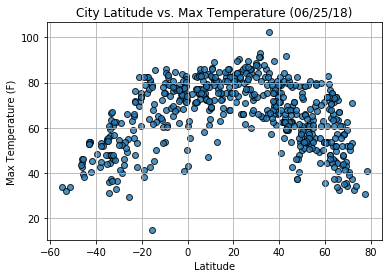

In [7]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

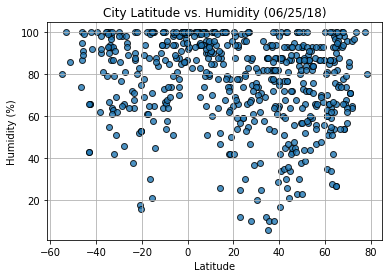

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

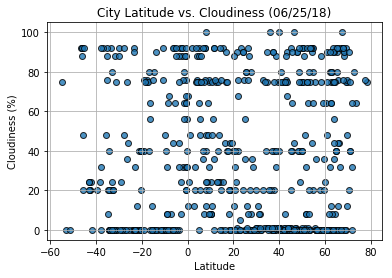

In [11]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

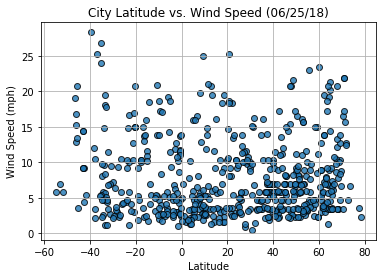

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()